# Scikit-Learn简介

目前，`Python` 有不少可以实现各种机器学习算法的程序库。  
`Scikit-Learn`（<http://scikit-learn.org>）是最流行的程序包之一，它为各种常用机器学习算法提供了高效版本。  
`Scikit-Learn` 不仅因其干净、统一、管道命令式的 `API` 而独具特色，而且它的在线文档又实用、又完整。  
这种统一性的好处是，只要你掌握了 `Scikit-Learn` 一种模型的基本用法和语法，就可以非常平滑地过渡到新的模型或算法上。

## 1. Scikit-Learn的数据表示

机器学习是从数据创建模型的学问，因此你首先需要了解怎样表示数据才能让计算机理解。`Scikit-Learn` 认为数据表示最好的方法就是用数据表的形式。

### 1.1. 数据表

基本的数据表就是二维网格数据，其中的每一行表示数据集中的每个样本，而列表示构成每个样本的相关特征。  
例如 Ronald Fisher 在 1936 年对鸢尾花数据集（<https://en.wikipedia.org/wiki/Iris_flower_data_set>）的经典分析。

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')  # 数据已经保存在../data/seaborn_iris.csv
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


其中的每行数据表示每朵被观察的鸢尾花，行数表示数据集中记录的鸢尾花总数。一般情况下，会将这个矩阵的行称为**样本**（`samples`），行数记为 `n_samples`。  
同样，每列数据表示每个样本某个特征的量化值。一般情况下，会将矩阵的列称为**特征**（`features`），列数记为 `n_features`。

### 1.2. 特征矩阵

这个表格布局通过二维数组或矩阵的形式将信息清晰地表达出来，所以我们通常把这类矩阵称为**特征矩阵**（`features matrix`）。  
特征矩阵通常被简记为变量 `X`。它是维度为 `[n_samples, n_features]` 的二维矩阵，通常可以用 `NumPy` 数组或 `Pandas` 的 `DataFrame` 来表示，不过 `Scikit-Learn` 也支持 `SciPy` 的稀疏矩阵。  
样本（即每一行）通常是指数据集中的每个对象。例如，样本可能是一朵花、一个人、一篇文档、一幅图像，或者一首歌、一部影片、一个天体，甚至是任何可以通过一组量化方法进行测量的实体。  
特征（即每一列）通常是指每个样本都具有的某种量化观测值。一般情况下，特征都是实数，但有时也可能是布尔类型或者离散值。

### 1.3. 目标数组

除了特征矩阵 `X` 之外，我们还需要一个**标签**或**目标**数组，通常简记为 `y`。  
目标数组一般是一维数组，其长度就是样本总数 `n_samples`，通常都用一维的 `NumPy` 数组或 `Pandas` 的 `Series` 表示。  
目标数组可以是连续的数值类型，也可以是离散的类型 / 标签。虽然有些 `Scikit-Learn` 的评估器可以处理具有多目标值的二维 `[n_samples, n_targets]` 目标数组，但此处基本上只涉及常见的一维目标数组问题。  
如何区分目标数组的特征与特征矩阵中的特征列，一直是个问题。目标数组的特征通常是我们希望**从数据中预测**的量化结果；借用统计学的术语，`y` 就是因变量。  
以前面的示例数据为例，我们需要通过其他测量值来建立模型，预测花的品种（`species`），而这里的 `species` 列就可以看成是目标数组。知道这一列是目标数组之后，就可以用 `Seaborn` 对数据进行可视化了：

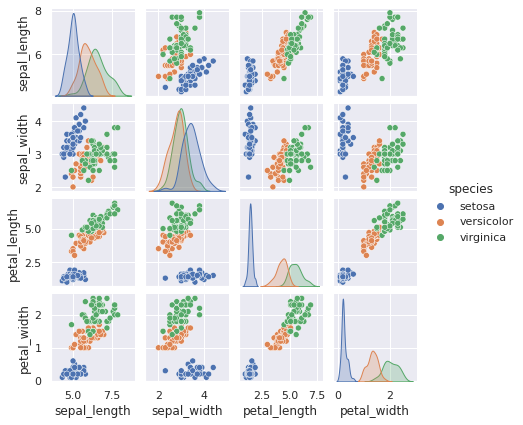

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()

sns.pairplot(iris, hue='species', height=1.5)

在使用 `Scikit-Learn` 之前，我们需要从 `DataFrame` 中抽取特征矩阵和目标数组。可以用第 3 章介绍的 `Pandas DataFrame` 基本操作来实现：

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

特征矩阵和目标数组的布局如下图所示。  
![](../data/figures/05.02-samples-features.png)  
有了适当的数据形式之后，就可以开始学习 Scikit-Learn 的评估器 `API` 了。

## 2. Scikit-Learn的评估器API

`Scikit-Learn API` 主要遵照以下设计原则，`Scikit-Learn API` 文档也对此有所概述。
- 统一性
    - 所有对象使用共同接口连接一组方法和统一的文档。
- 内省
    - 所有参数值都是公共属性。
- 限制对象层级
    - 只有算法可以用 `Python` 类表示。数据集都用标准数据类型（`NumPy` 数组、`Pandas DataFrame`、`SciPy` 稀疏矩阵）表示，参数名称用标准的 `Python` 字符串。
- 函数组合
    - 许多机器学习任务都可以用一串基本算法实现，`Scikit-Learn` 尽力支持这种可能。
- 明智的默认值
    - 当模型需要用户设置参数时，`Scikit-Learn` 预先定义适当的默认值。

只要你理解了这些设计原则，就会发现 `Scikit-Learn` 非常容易使用。`Scikit-Learn` 中的所有机器学习算法都是通过评估器 `API` 实现的，它为各种机器学习应用提供了统一的接口。

### 2.1. API基础知识

`Scikit-Learn` 评估器 `API` 的常用步骤如下所示（后面介绍的示例都是按照这些步骤进行的）。
1. 通过从 `Scikit-Learn` 中导入适当的评估器类，选择模型类。
2. 用合适的数值对模型类进行实例化，配置模型超参数（`hyperparameter`）。
3. 整理数据，通过前面介绍的方法获取特征矩阵和目标数组。
4. 调用模型实例的 `fit()` 方法对数据进行拟合。
5. 对新数据应用模型：
    - 在有监督学习模型中，通常使用 `predict()` 方法预测新数据的标签；
    - 在无监督学习模型中，通常使用 `transform()` 或 `predict()` 方法转换或推断数据的性质。

下面按照步骤来演示几个使用了有监督学习方法和无监督学习方法的示例。

### 2.2. 有监督学习示例：简单线性回归

让我们来演示一个简单线性回归的建模步骤——最常见的任务就是为散点数据集 `(x, y)` 拟合一条直线。我们将使用下面的样本数据来演示这个回归示例：

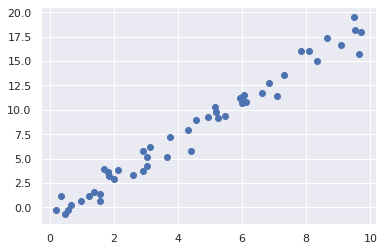

In [9]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

有了数据，就可以将前面介绍的步骤付诸实现了，先一步步来。

#### 2.2.1. 选择模型类

在 `Scikit-Learn` 中，每个模型类都是一个 `Python` 类。因此，假如我们想要计算一个简单线性回归模型，那么可以直接导入线性回归模型类：

In [10]:
from sklearn.linear_model import LinearRegression

除了简单线性模型，常用的线性模型还有许多，具体内容请参考 `sklearn.linear_model` 模块文档（<http://scikitlearn.org/stable/modules/linear_model.html>）。

#### 2.2.2. 选择模型超参数

请注意，**模型类与模型实例不同**。  
当我们选择了模型类之后，还有许多参数需要配置。根据不同模型的不同情况，你可能需要回答以下问题。
- 我们想要拟合偏移量（即直线的截距）吗？
- 我们需要对模型进行归一化处理吗？
- 我们需要对特征进行预处理以提高模型灵活性吗？
- 我们打算在模型中使用哪种正则化类型？
- 我们打算使用多少模型组件？

有一些重要的参数必须在**选择模型类时**确定好。这些参数通常被称为**超参数**，即在模型拟合数据之前必须被确定的参数。  
在 `Scikit-Learn` 中，我们通常在模型初始化阶段选择超参数。5.3 节将介绍如何定量地选择超参数。

对于现在这个线性回归示例来说，可以实例化 `LinearRegression` 类并用 `fit_intercept` 超参数设置是否想要拟合直线的截距：

In [28]:
model = LinearRegression(fit_intercept=True)
model

# 以前版本的输出为：LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression()

需要注意的是，对模型进行实例化其实仅仅是存储了超参数的值。我们还没有将模型应用到数据上：`Scikit-Learn` 的 `API` 对选择模型和将模型应用到数据区别得很清晰。

#### 2.2.3. 将数据整理成特征矩阵和目标数组

前面介绍了 `Scikit-Learn` 的数据表示方法，它需要二维特征矩阵和一维目标数组。虽然我们的目标数组已经有了 `y`（长度为 `n_samples` 的数组），但还需要将数据 `x` 整理成 `[n_samples, n_features]` 的形式。  
在这个示例中，可以对一维数组进行简单的维度变换：

In [16]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 2.2.4. 用模型拟合数据

现在就可以将模型应用到数据上了，这一步通过模型的 `fit()` 方法即可完成：

In [29]:
model.fit(X, y)

# 以前版本的输出为：LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression()

`fit()` 命令会在模型内部进行大量运算，运算结果将存储在模型属性中，供用户使用。在 `Scikit-Learn` 中，所有通过 `fit()` 方法获得的模型参数都带一条下划线。  
例如，在线性回归模型中，模型参数如下所示：

In [30]:
model.coef_

array([1.9776566])

In [31]:
model.intercept_

-0.9033107255311146

这两个参数分别表示对样本数据拟合直线的斜率和截距。与前面样本数据的定义（斜率 2、截距 -1）进行比对，发现拟合结果与样本非常接近。  
模型参数的不确定性是机器学习经常遇到的问题。一般情况下，`Scikit-Learn` 不会为用户提供直接从模型参数获得结论的工具；与其将模型参数解释为**机器学习**问题，不如说它更像**统计建模**问题。  
机器学习的重点并不是模型的**预见性**。如果你想要对模型拟合参数的意义和其他相关参数分析工具有更深入的理解，请参考 `StatsModels Python` 程序包（<http://statsmodels.sourceforge.net/>）。

#### 2.2.5. 预测新数据的标签

模型训练出来之后，有监督机器学习的主要任务就变成了对不属于训练集的新数据进行预测。  
在 `Scikit-Learn` 中，我们用 `predict()` 方法进行预测。“新数据”是特征矩阵的 `x` 坐标值，我们需要用模型预测出目标数组的 `y` 轴坐标：

In [32]:
xfit = np.linspace(-1, 11)

首先，将这些 `x` 值转换成 `[n_samples, n_features]` 的特征矩阵形式，之后将其输入到模型中：

In [34]:
Xfit = xfit[:, np.newaxis]
yfit= model.predict(Xfit)

最后，把原始数据和拟合结果都可视化出来：

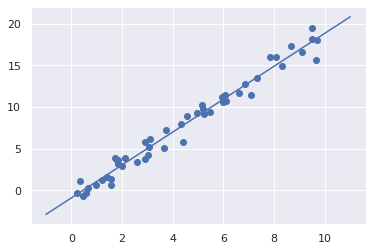

In [35]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

### 2.3. 有监督学习示例：鸢尾花数据分类

In [ ]:
再介绍一个有监督学习示例，还是用前面介绍过的鸢尾花数据集。这个示例的问题是：如何为鸢尾花数据集建立模型，先用一部分数据进行训练，再用模型预测出其他样本的标签？  
我们将使用非常简单的高斯朴素贝叶斯（`Gaussian naive Bayes`）方法完成这个任务，这个方法假设每个特征中属于每一类的观测值都符合高斯分布。  
因为高斯朴素贝叶斯方法速度很快，而且不需要选择超参数，所以通常很适合作为初步分类手段，在借助更复杂的模型进行优化之前使用。  
由于需要用模型之前没有接触过的数据评估它的训练效果，因此得先将数据分割成训练集（`training set`）和测试集（`testing set`）。虽然完全可以手动实现分割数据集，但是借助 `train_test_split` 函数会更方便：

### 2.4. 无监督学习示例：鸢尾花数据降维

### 2.5. 无监督学习示例：鸢尾花数据聚类

## 3. 应用：手写数字探索

### 3.1. 加载并可视化手写数字

### 3.2. 无监督学习：降维

### 3.3. 数字分类